## Exercise 7 Part 2: Categorical Feature Selection

In [2]:
# First I will import some needed libraries
import pandas as pd
from importlib import reload
import sys
import numpy as np
from imp import reload
import nltk
import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec 
%matplotlib inline
import seaborn as sns 
import re
import string
from nltk.stem import WordNetLemmatizer
import warnings
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
warnings.filterwarnings('ignore')
if sys.version[0] == '2':
    reload(sys)
    sys.setdefaultencoding("utf-8")

## Step 1: Import the housing data as a data frame and ensure that the data is loaded properly.

In [3]:
# I will use pandas to pull the data to create a data frame to work from
mushroom_Data = pd.read_csv('mushrooms.csv')
mushroom_Data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


### Step 2: Convert the categorical features (all of them) to dummy variables

In [5]:
# First I will check and see the difference between the numerical features and 
# the categorical features
categorical_features = mushroom_Data.select_dtypes(include=['object']).columns
print(categorical_features)
numerical_features = mushroom_Data.select_dtypes(exclude = ["object"]).columns
print(numerical_features)

print("Numerical features : " + str(len(numerical_features)))
print("Categorical features : " + str(len(categorical_features)))
feat_num = mushroom_Data[numerical_features]
feat_cat = mushroom_Data[categorical_features]

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')
Index([], dtype='object')
Numerical features : 0
Categorical features : 23


In [6]:
# Now I will check and make sure we have no NAs
Update_NA_output = mushroom_Data.isnull().sum()/len(mushroom_Data)
Update_NA_output

class                       0.0
cap-shape                   0.0
cap-surface                 0.0
cap-color                   0.0
bruises                     0.0
odor                        0.0
gill-attachment             0.0
gill-spacing                0.0
gill-size                   0.0
gill-color                  0.0
stalk-shape                 0.0
stalk-root                  0.0
stalk-surface-above-ring    0.0
stalk-surface-below-ring    0.0
stalk-color-above-ring      0.0
stalk-color-below-ring      0.0
veil-type                   0.0
veil-color                  0.0
ring-number                 0.0
ring-type                   0.0
spore-print-color           0.0
population                  0.0
habitat                     0.0
dtype: float64

As seen above we have all Categorical features and no NAs so we can convert all the categorical features to dummy variables. 

In [7]:
# Next I will split my data to have my target variable in one dataframe 
# and the feature variables in the other.
X_data = mushroom_Data.drop(['class'],axis=1)
y_data = mushroom_Data['class']

In [8]:
# I will now convert my X_data which is the feature variables to dummy variables 
X_data = pd.get_dummies(X_data)
X_data.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [9]:
# I will also use LabelEncoder from sklearn.preprocessing to encode my 
# y_data for my target variable class
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y_data = encoder.fit_transform(y_data)
print(y_data)

[1 0 0 ... 0 1 0]


### Step 3: Split the data into a training and test set.

In [10]:
from sklearn.model_selection import train_test_split
# First I will split my data into training and test data:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=1)

### Step 4: Fit a decision tree classifier on the training set.

In [11]:
# First I will import some needed libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

In [12]:
# Next I will use the Decision Tree Classifier and use the Gini 
# criterion to split for impurity.
decision_tree = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
# Next I will fit the model
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

[Text(386.3076923076923, 475.65000000000003, 'X[27] <= 0.5\ngini = 0.499\nsamples = 6499\nvalue = [3388, 3111]'),
 Text(206.03076923076924, 339.75, 'X[53] <= 0.5\ngini = 0.288\nsamples = 3660\nvalue = [637, 3023]'),
 Text(103.01538461538462, 203.85000000000002, 'X[55] <= 0.5\ngini = 0.135\nsamples = 3229\nvalue = [236, 2993]'),
 Text(51.50769230769231, 67.94999999999999, 'gini = 0.055\nsamples = 3080\nvalue = [87, 2993]'),
 Text(154.52307692307693, 67.94999999999999, 'gini = 0.0\nsamples = 149\nvalue = [149, 0]'),
 Text(309.04615384615386, 203.85000000000002, 'X[94] <= 0.5\ngini = 0.13\nsamples = 431\nvalue = [401, 30]'),
 Text(257.53846153846155, 67.94999999999999, 'gini = 0.0\nsamples = 30\nvalue = [0, 30]'),
 Text(360.55384615384617, 67.94999999999999, 'gini = 0.0\nsamples = 401\nvalue = [401, 0]'),
 Text(566.5846153846154, 339.75, 'X[100] <= 0.5\ngini = 0.06\nsamples = 2839\nvalue = [2751, 88]'),
 Text(515.0769230769231, 203.85000000000002, 'X[63] <= 0.5\ngini = 0.023\nsamples = 27

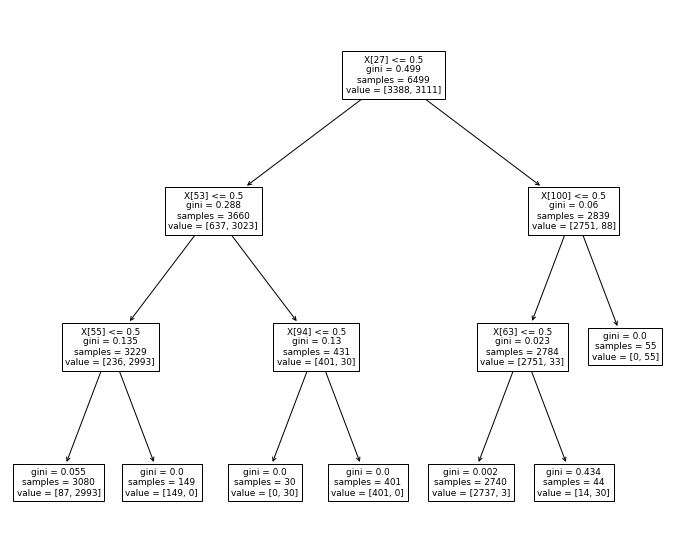

In [16]:
# Next I will plot my tree with the train data 
plt.figure(figsize=(12,10))
tree.plot_tree(decision_tree.fit(X_train, y_train))

### Step 5: Report the accuracy and create a confusion matrix for the model prediction on the test set.

In [17]:
# First I will predict my values for the X_test
y_pred = decision_tree.predict(X_test)

In [18]:
# Next I will determine the accuracy for my y_test and y_pred
print('Accuracy for test set: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Accuracy for test set: 0.9902


In [19]:
# Next I will create a confusion matrix for the the model prediction on the test set.
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import  f1_score

# First I will set my confusion matrix to the y_test and the y_pred
confusion_m = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', confusion_m)

Confusion matrix

 [[809  11]
 [  5 800]]


As seen above we see the Accuracy for test set: 0.9902 and the Confusion matrix is [809 11] and [5 800] 

### Step 6: Create a visualization of the decision tree.

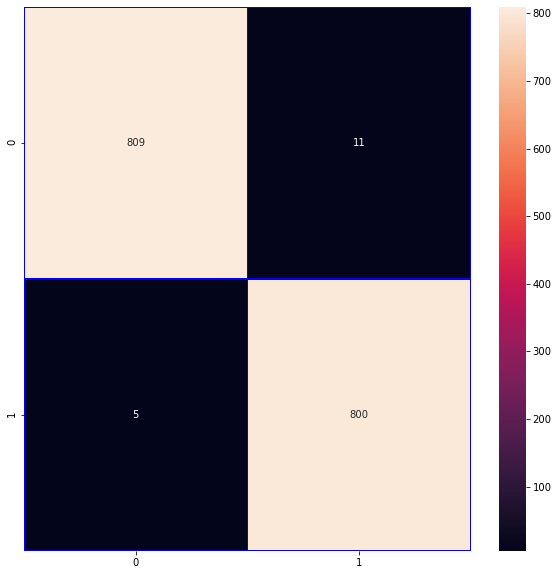

<Figure size 432x288 with 0 Axes>

In [22]:
# Next I will plot my confusion matrix with a heat map from sns
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(confusion_m, annot=True, linewidths=0.5,linecolor="blue", fmt= '.0f',ax=ax)
plt.show()
plt.savefig('ConfusionMatrix.png')

### Step 7: Use a χ2-statistic selector to pick the five best features for this data (see section 10.4 of the Machine Learning with Python Cookbook).

In [53]:
# First I will import needed libraries and select the five 
# features with the highest chi-squared statistic
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif
feature_X_data = X_data.astype(int)
chi2_select = SelectKBest(chi2, k=5)
feature_kbest = chi2_select.fit_transform(X_data, y_data)

In [54]:
# Next I will view the results for the features with the highest chi-squared statistic
print("Original features:", X_data.shape[1])
print("Reduced features:", feature_kbest.shape[1])

Original features: 117
Reduced features: 5


### Step 8: Which five features were selected in step 7? Hint: Use the get_support function.

In [60]:
# I will use the get_support on my chi2_select to see the output
chi2_select.get_support()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
        True, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False])

### Step 9: Repeat steps 4 and 5 with the five best features selected in step 7.

### Step 9.4: Fit a decision tree classifier on the SelectKBest set.

In [63]:
# First I will use the Decision Tree Classifier to fit the model
decision_tree.fit(feature_kbest, y_data)

DecisionTreeClassifier(max_depth=3, random_state=0)

[Text(306.90000000000003, 475.65000000000003, 'X[1] <= 0.5\ngini = 0.499\nsamples = 8124\nvalue = [4208, 3916]'),
 Text(167.4, 339.75, 'X[3] <= 0.5\ngini = 0.288\nsamples = 4596\nvalue = [800, 3796]'),
 Text(111.60000000000001, 203.85000000000002, 'X[2] <= 0.5\ngini = 0.444\nsamples = 2400\nvalue = [800, 1600]'),
 Text(55.800000000000004, 67.94999999999999, 'gini = 0.499\nsamples = 1536\nvalue = [800, 736]'),
 Text(167.4, 67.94999999999999, 'gini = 0.0\nsamples = 864\nvalue = [0, 864]'),
 Text(223.20000000000002, 203.85000000000002, 'gini = 0.0\nsamples = 2196\nvalue = [0, 2196]'),
 Text(446.40000000000003, 339.75, 'X[3] <= 0.5\ngini = 0.066\nsamples = 3528\nvalue = [3408, 120]'),
 Text(334.8, 203.85000000000002, 'X[4] <= 0.5\ngini = 0.051\nsamples = 3352\nvalue = [3264, 88]'),
 Text(279.0, 67.94999999999999, 'gini = 0.052\nsamples = 3280\nvalue = [3192, 88]'),
 Text(390.6, 67.94999999999999, 'gini = 0.0\nsamples = 72\nvalue = [72, 0]'),
 Text(558.0, 203.85000000000002, 'X[4] <= 0.5\ng

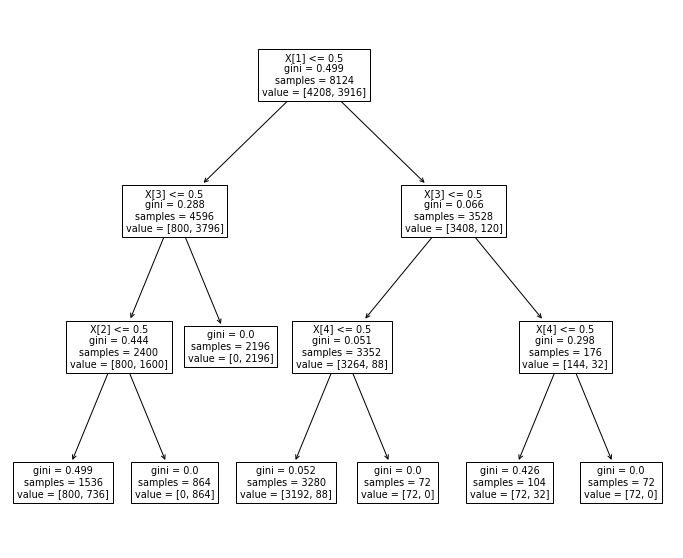

In [64]:
# Next I will plot my tree with the train data 
plt.figure(figsize=(12,10))
tree.plot_tree(decision_tree.fit(feature_kbest, y_data))

### Step 9.5: Report the accuracy and create a confusion matrix for the model prediction on the SelectKBest set.

In [66]:
# First I will predict my values for the X_test
y_pred_kbest = decision_tree.predict(feature_kbest)

In [70]:
# Next I will determine the accuracy for my y_test and y_pred
print('Accuracy for SelectKBest set: {0:0.4f}'. format(accuracy_score(y_data, y_pred_kbest)))

Accuracy for SelectKBest set: 0.8946


In [71]:
# First I will set my confusion matrix to the y_test and the y_pred
confusion_m_kbest = confusion_matrix(y_data, y_pred_kbest)

print('SelectKBest Confusion matrix\n\n', confusion_m_kbest)

SelectKBest Confusion matrix

 [[4208    0]
 [ 856 3060]]


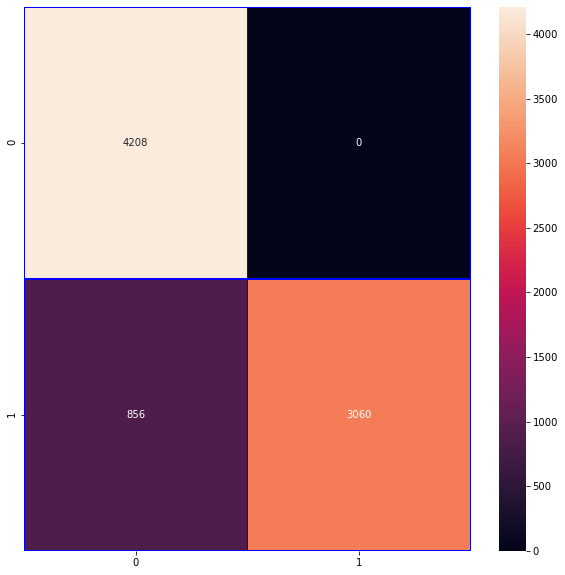

<Figure size 432x288 with 0 Axes>

In [69]:
# Next I will plot my confusion matrix with a heat map from sns
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(confusion_m_kbest, annot=True, linewidths=0.5,linecolor="blue", fmt= '.0f',ax=ax)
plt.show()
plt.savefig('ConfusionMatrix.png')

As seen above we see the Accuracy for SelectKBest set: 0.8946 and the Confusion matrix is [4208 0] and [856 3060] while the the Accuracy for the first test set was: 0.9902 and the Confusion matrix was [809 11] and [5 800].So we see our accuracy was less.

### Step 10: Summarize your findings.

In my report I found that when I fit a decision tree classifier on the training set my Accuracy for test set was 99.02% and the Confusion matrix was [809 11] and [5 800] which was higher than my findings with my SelectKBest. As we saw that the Accuracy for SelectKBest set: 89.46% and the Confusion matrix is [4208 0] and [856 3060]. 